# Agenda
- What is the drawback of using the train/test split procedure?
- How does **K-fold cross-validation** overcome this limitation
- How can cross-validation be used for selecting **tuning parameters**, choosing bewtween **models**, and selecting **features**?
- What are some possible **improvements** to cross-validation?

# Review of model evaluation procedures

**Motivation:** Need a way to choose between machine learning models
- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** Train and test on the same data
- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data

**Alternative idea:** Train/Test split
- split the datset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

### So what if we create a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

### K-fold cross-validation

## Steps for K-fold cross-validation

1. Split the dataset into K equal partitions(or "folds")
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

![5-fold cross-validation](images/07_cross_validation_diagram.png)

In [12]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf):
    print(iteration,data[0],data[1])

Iteration                   Training set observations                   Testing set observations
0 [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4]
1 [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
2 [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24] [10 11 12 13 14]
3 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24] [15 16 17 18 19]
4 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23 24]


## Cross-validation recommendations
1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

In [13]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters(aka "hyperparameters") for KNN on the iris dataset

In [15]:
from sklearn.cross_validation import cross_val_score

In [16]:
# initial 10-fold cross validation with K=5 for KNN(the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [17]:
#use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


In [19]:
# search for an optimal value of K for KNN
k_range = list(range(1,31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


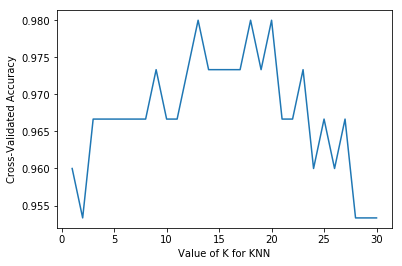

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Cross-validation example: model selection

**Goal:** Compare the best KNN model with logistic regression on the iris dataset

In [23]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression

# search for an optimal value of K for KNN
t_range = list(range(1,31))
t_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    logreg = LogisticRegression()
    k_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    l_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
    ks = k_scores.mean()
    ls = l_scores.mean()
    t_scores.append([ks,ls])
    
print(t_scores)

[[0.95999999999999996, 0.95333333333333337], [0.95333333333333337, 0.95333333333333337], [0.96666666666666656, 0.95333333333333337], [0.96666666666666656, 0.95333333333333337], [0.96666666666666679, 0.95333333333333337], [0.96666666666666679, 0.95333333333333337], [0.96666666666666679, 0.95333333333333337], [0.96666666666666679, 0.95333333333333337], [0.97333333333333338, 0.95333333333333337], [0.96666666666666679, 0.95333333333333337], [0.96666666666666679, 0.95333333333333337], [0.97333333333333338, 0.95333333333333337], [0.98000000000000009, 0.95333333333333337], [0.97333333333333338, 0.95333333333333337], [0.97333333333333338, 0.95333333333333337], [0.97333333333333338, 0.95333333333333337], [0.97333333333333338, 0.95333333333333337], [0.98000000000000009, 0.95333333333333337], [0.97333333333333338, 0.95333333333333337], [0.98000000000000009, 0.95333333333333337], [0.96666666666666656, 0.95333333333333337], [0.96666666666666656, 0.95333333333333337], [0.97333333333333338, 0.9533333

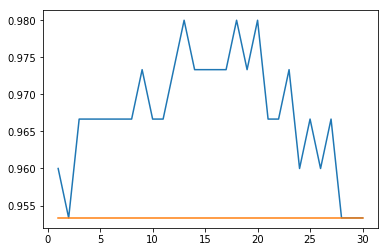

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(t_range, t_scores)

# Cross-validation example: feature selection

**Goal:** Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
print(data.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [31]:
feature_cols = ["TV",'radio','newspaper']

X = data[feature_cols]
y = data['sales']

lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring='neg_mean_squared_error')
print(abs(scores))

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [35]:
rmse_scores = np.sqrt(abs(scores))
print(rmse_scores.mean())

1.69135317081


In [37]:
feature_cols = ["TV",'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.67967484191


## Improvements to cross-validation

### Repeated cross-validation
- Repeat cross-validation multiple times(with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performace by **reducing the variance** associcated with a single trial

###  Creating a hold-out set
- 'Hold-out' a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performace since hold-out set is **truly out-of-sample**

### Feature engineering and selection within cross-validation iterations
- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation ireration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data


# Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter?**
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read in data
iris = load_iris()

# create X(features), y(response)
X = iris.data
y = iris.target

In [8]:
# 10 fold
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [9]:
print(scores.mean())

0.966666666667


In [12]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


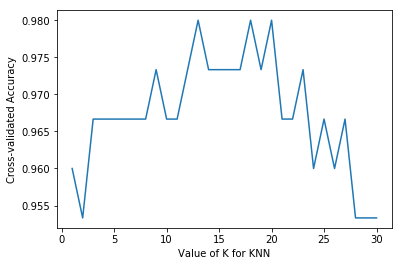

In [13]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel("Cross-validated Accuracy")

# More efficient parameter tuning using GridSearchCV

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [17]:
from sklearn.model_selection import GridSearchCV

In [24]:
k_range = list(range(1,31))
print (k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [25]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [27]:
#instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [28]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [37]:
#view the complete results(list of named tuples)
grid_results = grid.cv_results_

In [38]:
mean_test_score = grid_results["mean_test_score"]
print(mean_test_score)

[ 0.96        0.95333333  0.96666667  0.96666667  0.96666667  0.96666667
  0.96666667  0.96666667  0.97333333  0.96666667  0.96666667  0.97333333
  0.98        0.97333333  0.97333333  0.97333333  0.97333333  0.98
  0.97333333  0.98        0.96666667  0.96666667  0.97333333  0.96
  0.96666667  0.96        0.96666667  0.95333333  0.95333333  0.95333333]


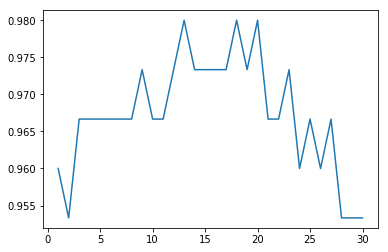

In [39]:
plt.plot(k_range, mean_test_score)

In [42]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


# Searching multiple parameters simultaneously
- **Example:** tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
- Could tune parameters **independently:** change max_depth while leaving min_samples_leaf at its default value, and vice versa
- But best performance might be achieved when **neither parameter** is at its default value

In [45]:
# define the parameter values that should be searched
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']

#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print (param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [50]:
#instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)

#view the complete results
print(grid.cv_results_["mean_test_score"])
print(grid.best_score_)
print(grid.best_params_)

[ 0.96        0.96        0.95333333  0.96        0.96666667  0.96666667
  0.96666667  0.96666667  0.96666667  0.96666667  0.96666667  0.96666667
  0.96666667  0.96666667  0.96666667  0.96666667  0.97333333  0.97333333
  0.96666667  0.97333333  0.96666667  0.97333333  0.97333333  0.97333333
  0.98        0.97333333  0.97333333  0.97333333  0.97333333  0.98
  0.97333333  0.97333333  0.97333333  0.98        0.98        0.97333333
  0.97333333  0.98        0.98        0.96666667  0.96666667  0.96666667
  0.96666667  0.96666667  0.97333333  0.97333333  0.96        0.97333333
  0.96666667  0.97333333  0.96        0.96666667  0.96666667  0.98
  0.95333333  0.97333333  0.95333333  0.97333333  0.95333333  0.96666667]
0.98
{'n_neighbors': 13, 'weights': 'uniform'}


In [54]:
#GridSearchCV automatically refits the best model using all of the data
new_data = [3, 5, 4, 2]
grid.predict(new_data)

C:\Users\scout\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])